# London Bike Sharing Dataset
## A dataset from Kaggle

This dataset can be downloaded directly from Kaggle [here](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset). 

### Summary of Dataset
As a summary, this data provides historical data of London bike sharing. This data can be used to help predict future bike sharing in London City. 


In [1]:
# Read in Appropriate Libraries
import pandas as pd             # used to read in and manipulate data. 
import numpy as np              # used to help with data manipulation
import matplotlib.pyplot as plt # used to visualise data
import seaborn as sns           # used to visualise data
import os                       # library to help read location of file. 
import os.path

# set WD to current file location
wd = os.getcwd()
os.chdir(wd)

In [2]:
# Read in raw_csv and visulaise first 5 rows of data
raw_data = pd.read_csv("ExploratoryDataAnalysis/DataSets/london_merged.csv")
raw_data.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
raw_data.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

We can see from the header of the data that we have 10 columns of data in this dataset. They all relate to the following information: 
- *timestamp* - is the date and time of day, used for grouping the data. 
- *cnt* - This is the cound of new bike shares.
- *t1* - The real temperature in C.
- *t2* - The feels like temperature in C. 
- *hum* - The humidity as a percentage.
- *wind_speed* - The wind speed in km/h.
- *weather_code* - The category of the weather.
- *is_holiday* - A boolean field representing holiday (1) or non-holiday (0).
- *is_weekend* - A boolean field representing the weekend (1) or a weekday (0).
- *season* - Categorical field representing the season:
    - Spring - 0
    - Summer - 1
    - Fall - 2
    - Winter - 3

Weather codes relate to:
- 1 = Clear or mostly clear. 
- 2 = Scattered Clouds or Few Clouds. 
- 3 = Broken Clouds.
- 4 = Cloudy. 
- 7 = Rain or Light Rain.
- 10 = Rain with Thunderstorms.
- 26 = Snowfall. 
- 94 = Freezing Fog.


Now we have the housekeeping out of the way, let's get in to actually exploring this data. 


***

## 1. Bikeshares by Time of Day or Day of Week

The first thing we will explore is when bike shares most commonly occur as a time of day. 
So let's do a little data manipulation and then visualise this. 

In [4]:
# First call raw_data and change to different variable name.
data_time = raw_data

# We will then convert our timestamp to a datetime value
data_time['timestamp'] = pd.to_datetime(data_time['timestamp'])

# Add two new columns for time of day and day of week. 
data_time['time'] = data_time['timestamp']
data_time['day'] = data_time['timestamp']

# View data to see columns were added
data_time.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,time,day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04 00:00:00,2015-01-04 00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04 01:00:00,2015-01-04 01:00:00
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04 02:00:00,2015-01-04 02:00:00
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04 03:00:00,2015-01-04 03:00:00
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04 04:00:00,2015-01-04 04:00:00


In [5]:
# We can now check our dtypes again
data_time.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
time            datetime64[ns]
day             datetime64[ns]
dtype: object

Perfect, so now that we have two new columns, which are in datetime format, let's convert their timestamps in to a time and day value for grouping. 

***

In [6]:
# Import datetime library for conversion of timestamp
import datetime

# Convert time value
data_time['time'] = data_time['time'].dt.hour

# Convert day value
data_time['day'] = data_time['day'].dt.weekday_name

data_time.head(5)


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,time,day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,Sunday
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,Sunday
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,Sunday
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,Sunday
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,Sunday


Great, so now we have converted our values, let's plot the count of bikeshares throughout the day. 

***

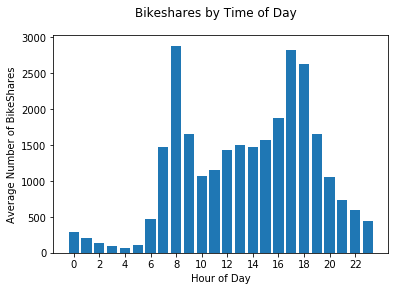

In [7]:
# Create groupby function for time of day
data_time_time = data_time.groupby('time').mean()

# Plot values calculated above
plt.figure()
plt.bar(data_time_time.index, data_time_time['cnt'])
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of BikeShares")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.suptitle("Bikeshares by Time of Day")
plt.show()

From this we can see that the early hours of the day have minimal usage. Which obviously makes sense based on work hours and so on. We also have a couple of major peaks throughout the day, at around 8am and again at 5-6pm. These are times when people are starting or finishing work, so again makes sense. So let's now look at the days of the week. 

***

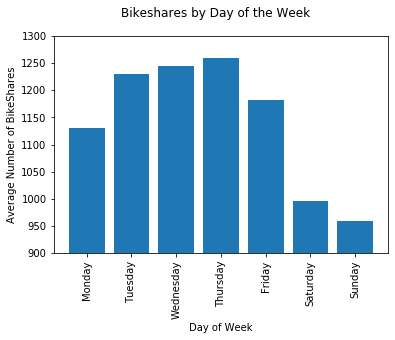

In [8]:
# Create groupby function for the day of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data_time_day = data_time.groupby('day').mean()
data_time_day = data_time_day.reindex(index = day_order)

# Plot values calculated above
plt.figure()
plt.bar(data_time_day.index, data_time_day['cnt'])
plt.xlabel("Day of Week")
plt.ylabel("Average Number of BikeShares")
plt.suptitle("Bikeshares by Day of the Week")
plt.xticks(rotation=90)
plt.ylim([900, 1300])
plt.show()

We can see that Monday through Friday is when the majority of bikeshares are taken. Therefore, this must be a use of transport for those that are working or going to university etc. Saturday and Sunday usage drops below 1000, indicating that people either stay home or opt for different transportation methods. 

***

Let's have a look and see if the number of shares change throughout the day in relation to some of our other information in the dataset. 

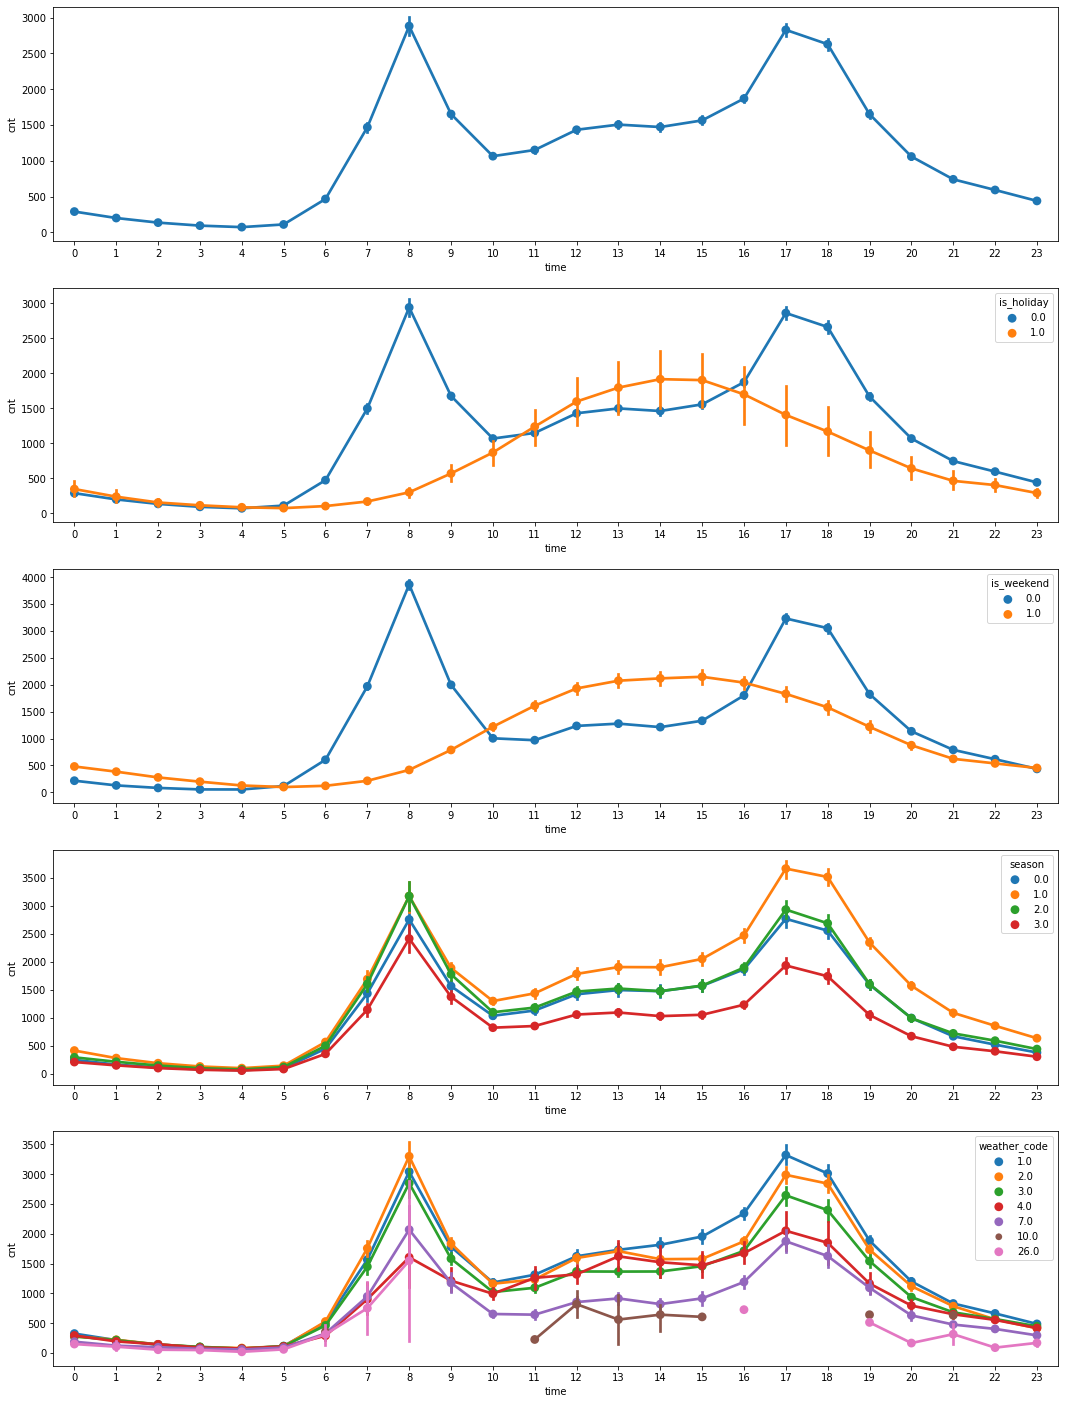

In [16]:
# Create a plot with 5 axes.
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

# Create all the subplots
sns.pointplot(data=data_time, x='time', y='cnt', ax=ax1)
sns.pointplot(data=data_time, x='time', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=data_time, x='time', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=data_time, x='time', y='cnt', hue='season', ax=ax4)
sns.pointplot(data=data_time, x='time', y='cnt', hue='weather_code',ax=ax5)

We can see that holidays and weekends follow similar trends, with a much more distinct curve that is consistant throughout the day. Whilst, weekdays have to distinctive spikes around the time of commuters beginning work for a day. 
The seasons have a similar trend, with slightly different absolute values. Winter in particular, indicates a big drop in the amount of bikeshares taken through the day. 

***

Now, what things are most related to eachother in this dataset?  
We can create a correlation matrix to take a look. 

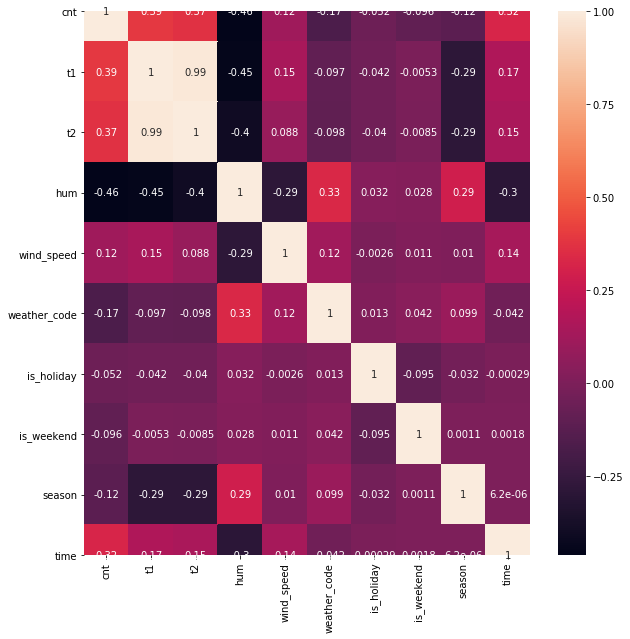

In [14]:
# Create a correlation matrix
corrmat = data_time.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrmat, vmax=1, annot=True);

From the above matrix, we can see that humidity has the strongest relationship, although negative with the number of bikeshares. Time and temperatures also have appear to have an impact on the number of bikeshares, but to a smaller degree. 

None of these correlations are really that strong though and so inclusion of most of these values would help us to provide a much stronger prediction.
But let's leave the prediction for another day! 